In [1]:
import pandas as pd
import sklearn.preprocessing as preproc

In [5]:
df = pd.read_csv("OnlineNewsPopularity.csv", delimiter = ", ")

C:\Users\timay\AppData\Local\Temp\ipykernel_46856\3831457473.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("OnlineNewsPopularity.csv", delimiter = ", ")


In [4]:
df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
df["n_tokens_content"]

0         219.0
1         255.0
2         211.0
3         531.0
4        1072.0
          ...  
39639     346.0
39640     328.0
39641     442.0
39642     682.0
39643     157.0
Name: n_tokens_content, Length: 39644, dtype: float64

In [5]:
df["minmax"]=preproc.minmax_scale(df[["n_tokens_content"]])

In [6]:
df["minmax"]

0        0.025844
1        0.030092
2        0.024900
3        0.062662
4        0.126505
           ...   
39639    0.040831
39640    0.038707
39641    0.052160
39642    0.080481
39643    0.018527
Name: minmax, Length: 39644, dtype: float64

In [7]:
df["standardized"]= preproc.StandardScaler().fit_transform(df[["n_tokens_content"]])

In [8]:
df["standardized"]

0       -0.695210
1       -0.618794
2       -0.712192
3       -0.032933
4        1.115439
           ...   
39639   -0.425630
39640   -0.463838
39641   -0.221852
39642    0.287592
39643   -0.826817
Name: standardized, Length: 39644, dtype: float64

In [9]:
df["l2_normalized"]=preproc.normalize(df[["n_tokens_content"]], axis= 0)

In [10]:
df["l2_normalized"]

0        0.001524
1        0.001775
2        0.001469
3        0.003696
4        0.007462
           ...   
39639    0.002408
39640    0.002283
39641    0.003077
39642    0.004747
39643    0.001093
Name: l2_normalized, Length: 39644, dtype: float64

Text(63.0, 0.5, 'Number of articles')

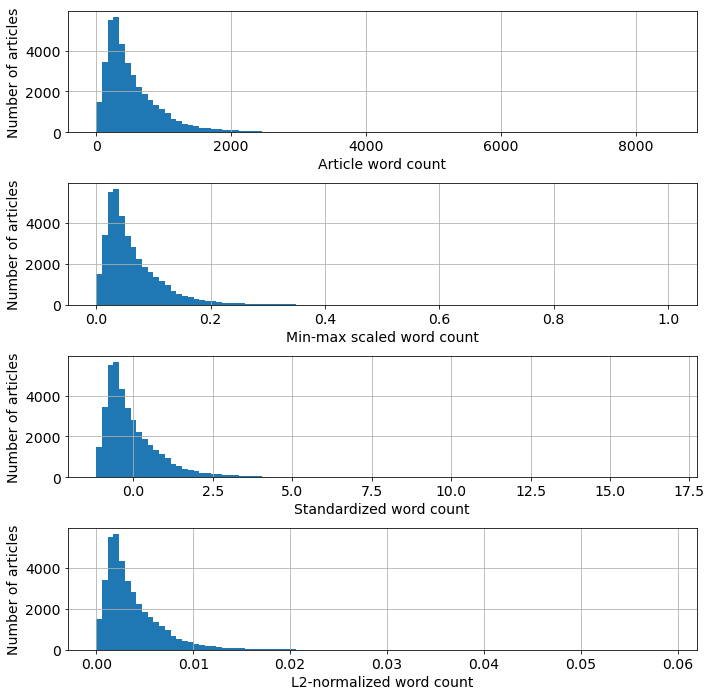

In [24]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(10, 10))
fig.tight_layout(pad=3.0)
df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)

df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles', fontsize=14)

df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14)

In [25]:
import json

In [26]:
biz_file = open('data/yelp_academic_dataset_business.json', encoding="utf8")
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()

In [27]:
biz_df.head(5)

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",True,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,Turf Paradise Race Course,[],-112.092329,AZ,4.0,33.638573,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",business
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},True,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,Sam's Club Members Only,[],-112.234755,AZ,3.5,33.648545,"{'Parking': {'garage': False, 'street': False,...",business
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,Forever 21,[],-111.964485,AZ,3.5,33.383123,"{'Parking': {'garage': False, 'street': False,...",business
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",True,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,Loving Hands Pet Care,[],-111.857818,AZ,5.0,33.356472,{},business
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},True,"[Veterinarians, Pets]",Phoenix,3,Amec Mid-City Animal Hospital,[],-112.097232,AZ,5.0,33.538493,{},business


Text(0, 0.5, 'Occurrence')

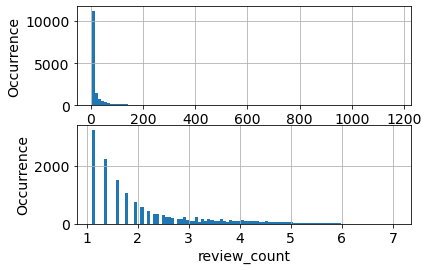

In [30]:
import numpy as np

fig, (ax1, ax2) = plt.subplots(2,1) 

biz_df['review_count'].hist(ax=ax1, bins=100) 
ax1.tick_params(labelsize=14) 
ax1.set_xlabel('review_count', fontsize=14) 
ax1.set_ylabel('Occurrence', fontsize=14)

np.log(biz_df['review_count']).hist(ax=ax2, bins=100) 
ax2.tick_params(labelsize=14) 
ax2.set_xlabel('review_count', fontsize=14) 
ax2.set_ylabel('Occurrence', fontsize=14)

In [31]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder 

In [32]:
data = asarray([["red"],["green"],["blue"]])

In [33]:
data

array([['red'],
       ['green'],
       ['blue']], dtype='<U5')

In [34]:
encoder = OrdinalEncoder()
result = encoder.fit_transform(data)

In [35]:
result

array([[2.],
       [1.],
       [0.]])

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
data = asarray([["red"],["green"],["blue"]])

In [38]:
encoder = OneHotEncoder(sparse=False)
result = encoder.fit_transform(data)

In [39]:
result

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])